<a href="https://colab.research.google.com/github/Nokulunga77/Bank-Segmentation-/blob/main/_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Banking Customer Segmentation 

#### by Nokulunga Twala

## Table of contents
1. [Introduction](#intro)
2. [Load Dependencies](#data)
3. [Data Preprocessing](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Feature Engineering And Selection](#features)
6. [Conclusion](#conclusion)


<a id="intro"></a>
## 1. **Introduction**

Customer segmentation reveals specific intelligence for banks to understand customers on a deeper level. To deliver the services customers are expecting, segmenting customers by their level of digital sophistication and financial acumen can helps banks stay on a competitive edge. When applied in combination with other segmental analyses, these insights open up subtler and more sophisticated ways to approach customers as their shift to digital accelerates.

Common customer segmentation attributes can include

**Income generated by Customers** - The past, current and the predicted future of a customer’s purchase along with the revenue generated by the bank

**Demographics** – This information about the customer will include age, geography, gender, generation, income level and marital status

**Stages of Life** – Focused primarily on various milestones achieved by the customer during journey with the bank – for example – graduating college or retirement

**Attitude** – Customers’ opinions on the banking industry, online and mobile banking, and their satisfaction with the bank

**Behavior** – Interactions between customers and banks, the channels and the frequency of their usage, and which products they adopt


**Problem Statement**

Most of the banks are on the path of moving away from branch banking and towards becoming truly digital. Looking at the customer segments, one can formulate the strategy around the need to go completely digital on short term basis or this can be done in a staggered way. E.g. If the bank’s predominant customer base is high net worth individuals beyond 50s, the spend can be distributed between introducing new products and digital. However, if the bank's customer base is young, in that case it makes more sense in driving good amount of IT budget towards online, mobile apps driven banking. 


**Objective / Aim**

* To identify different segments in the existing customer, based on their past interaction with the bank (Account Balances and Transactions), using clustering algorithms.

<a id="intro"></a>
## 2. **Load Dependencies**

In [1]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install clusteval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=ab6fc8a7dc96d02105ca6430757237f0a5dae4c1e0c52f11c4b0925660370f23
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


### Libraries 

In [3]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd

import requests
import io

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import skew
from scipy.stats import kurtosis
import statistics

# Data Preprocessing
import random
from time import time
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# for operating system
import os
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering


#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#making sure that we can see all rows and cols
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Case Study/bank_transactions.csv')
#df = pd.read_csv('bank_transactions.csv')

<a id="cleaning"></a>
## 3. **Data Preprocessing**

Data preprocessing is a technique that involves taking in raw data and transforming it into a understandable format and useful. The technique includes data cleaning, intergration, transformation, reduction and discretization.

In [6]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [7]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50


In [8]:
df.shape

(1048567, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [10]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1046198.00,1048567.00,1048567.00
mean,115403.54,157087.53,1574.34
std,846485.38,51261.85,6574.74
min,0.00,0.00,0.00
25%,4721.76,124030.00,161.00
50%,16792.18,164226.00,459.03
75%,57657.36,200010.00,1200.00
max,115035495.10,235959.00,1560034.99


**Checking Missing Values** 

In this section, we will be checking for missing values and how they are distributed through out the dataset.

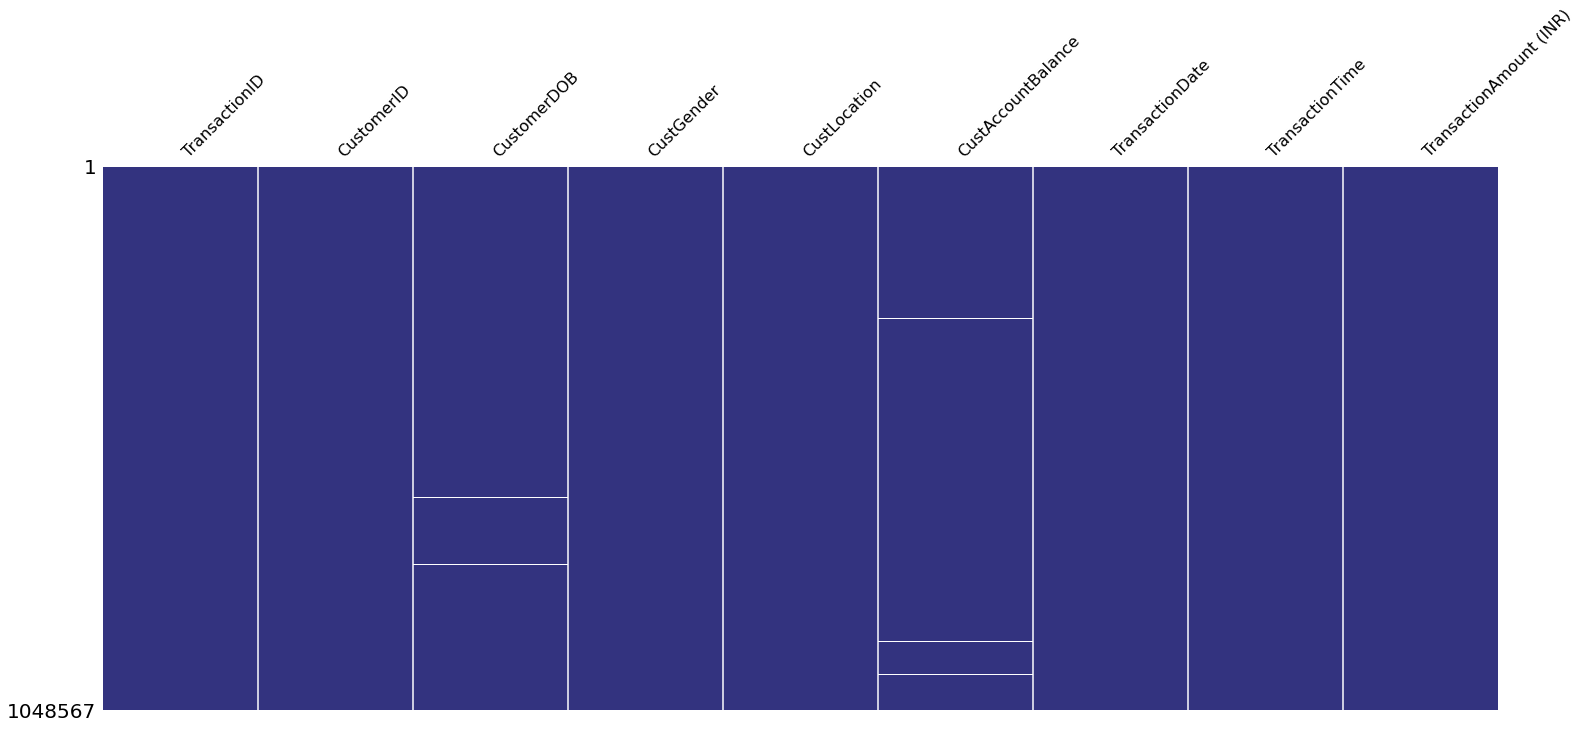

In [11]:
#distribution of the null values
import missingno as msno
msno.matrix(df,sparkline = False,color = (0.2, 0.2, 0.5))

In [12]:
(df.isnull().sum()/len(df))*100

TransactionID             0.00
CustomerID                0.00
CustomerDOB               0.32
CustGender                0.10
CustLocation              0.01
CustAccountBalance        0.23
TransactionDate           0.00
TransactionTime           0.00
TransactionAmount (INR)   0.00
dtype: float64

The missing values are less than 1% therefore they will be removed.

In [13]:
#To remove the nullvalues
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 1041614


**Removing unknown Gender category**

In [14]:
df['CustGender'].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

The data consist of 'T' as one of the gender values. However, for this project will be focusing on the M and F genders. There for the row with 'T' gender will be dropped. 

In [15]:
df.drop(df[df['CustGender'].isin(['T'])].index,axis=0,inplace=True)

**Getting Customers Age**

In order for us to be able to visualise our demographic information in relation to the customers bank transactions or account balance. We need to firstly need to extract the Age from the Customer Date of Birth column. 

In [16]:
#Age of customer during the transaction date
df['Age'] = (pd.DatetimeIndex(df['TransactionDate']).year) - (pd.DatetimeIndex(df['CustomerDOB']).year)

In [17]:
# Only show ages that are greater than 0 and less than 100
df = df[(df['Age'] >0) & (df['Age']< 100)]
df.drop('CustomerDOB',axis=1,inplace=True)

**Extracting Date**

In order for us to be able to explore the month and day of the transactions will have to extract them from the transaction date. 

In [18]:
#Extracting month and day from Transaction column
df.TransactionDate = pd.to_datetime(df.TransactionDate,errors='coerce')

In [19]:
df['TransactionMonth'] = df.TransactionDate.dt.month
df['TransactionMonthName'] = df.TransactionDate.dt.month_name()
df['TransactionDay'] = df.TransactionDate.dt.day
df['TransactionDayName'] = df.TransactionDate.dt.day_name()

In [20]:
df.drop('TransactionDate',axis=1,inplace=True)

In [21]:
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionMonth,TransactionMonthName,TransactionDay,TransactionDayName
0,T1,C5841053,F,JAMSHEDPUR,17819.05,143207,25.00,22,2,February,8,Monday
2,T3,C4417068,F,MUMBAI,17874.44,142712,459.00,20,2,February,8,Monday
3,T4,C5342380,F,MUMBAI,866503.21,142714,2060.00,43,2,February,8,Monday
4,T5,C9031234,F,NAVI MUMBAI,6714.43,181156,1762.50,28,2,February,8,Monday
5,T6,C1536588,F,ITANAGAR,53609.20,173940,676.00,44,2,February,8,Monday


In [22]:
df.shape

(910561, 12)

In [ ]:
#Exporting cleaned dataframe for PowerBI
df.to_csv (r'C:\Users\Twala\Desktop\export_dataframe.csv', index = False, header=True)


<a id="intro"></a>
## 4. **Exploratory Data Analysis**

The EDA data analysis is used to get a better understanding of data and look for the data. For statisticians, it is similar to a kind of storytelling. It allows for the discovery of trends and observations within data using visual methods. Aside from that, EDA is frequently used as the first step in the data modeling process. It will explore the dataset as well as perform the exploratory data analysis.

In [23]:
new_df = df.copy()

Text(0.5, 1.0, 'Distribution of Customer Gender')

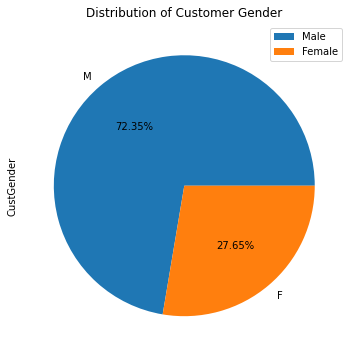

In [24]:
new_df.CustGender.value_counts().plot(kind = "pie", figsize = (9,6), autopct='%1.2f%%')
plt.legend(['Male', 'Female']);
plt.title("Distribution of Customer Gender")

A large proportion of bank customers are Male at 72.35%, as shown above. 



**Distibution Plot**

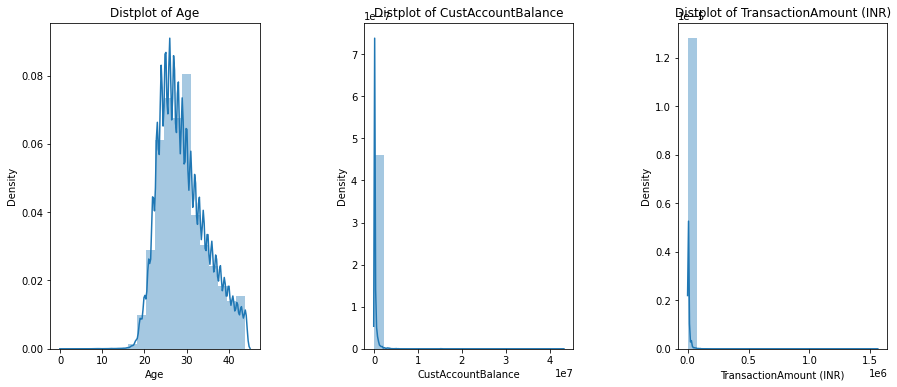

In [25]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'CustAccountBalance' , 'TransactionAmount (INR)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(new_df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Text(0.5, 1.0, 'Average Customer Account Balance by Gender')

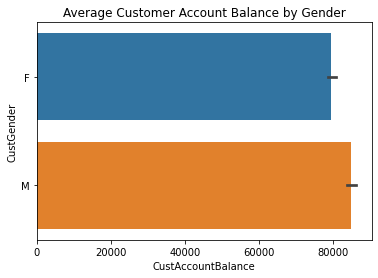

In [26]:
sns.barplot(x = 'CustAccountBalance' , y = 'CustGender', data = new_df)
plt.title("Average Customer Account Balance by Gender")

On average, Males bank customers have  marginally higher account balances than Female bank customers 

Text(0.5, 1.0, 'Average Transaction Amount by Gender')

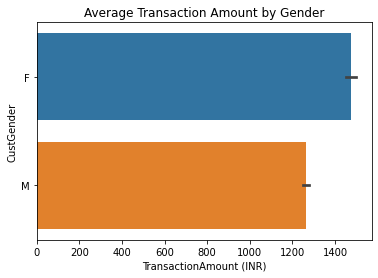

In [27]:
sns.barplot(x = 'TransactionAmount (INR)', y = 'CustGender', data = new_df)
plt.title('Average Transaction Amount by Gender')

On average, Female bank customers have bit higher transcations than Male Bank customers. 

**Monthly Account Balances and Spendings Per Gender**

Text(0.5, 1.0, 'Monthly Comparison of Account Balances between Genders')

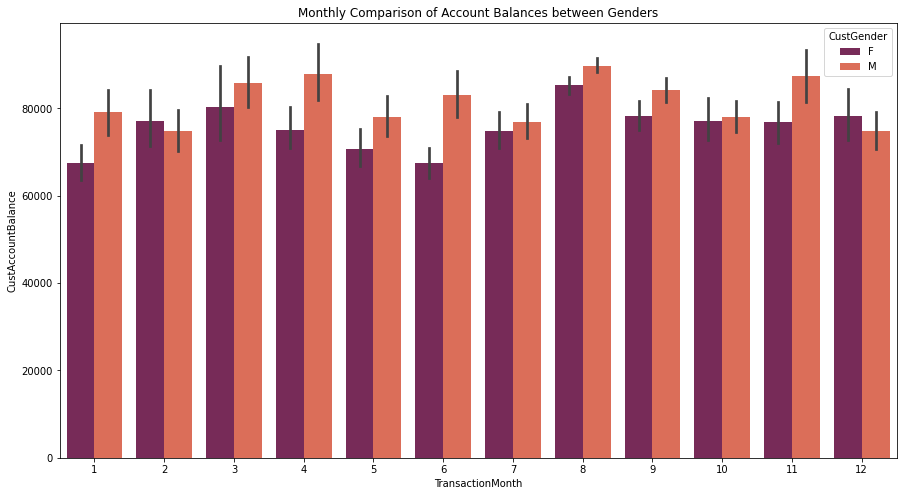

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'TransactionMonth',y = 'CustAccountBalance', data = new_df ,hue='CustGender', palette = "rocket" )
plt.title('Monthly Comparison of Account Balances between Genders')

Male customers have greater account balances through out the year than Female customers, as female customers make more transactions. 

Text(0.5, 1.0, 'Monthly Comparison of Spending Habits between Genders')

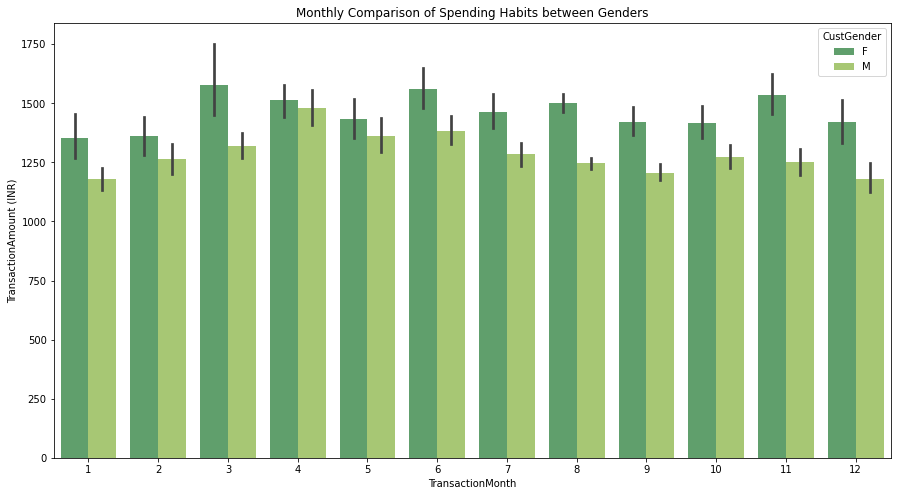

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'TransactionMonth',y = 'TransactionAmount (INR)', data = new_df ,hue='CustGender', palette ='summer')
plt.title('Monthly Comparison of Spending Habits between Genders')

Females perform a great deal of transactions almost through out the year, except for the months of February and April.

**Monthly Account Balances and Spending per Age**

Text(0.5, 1.0, 'Transactions per Age')

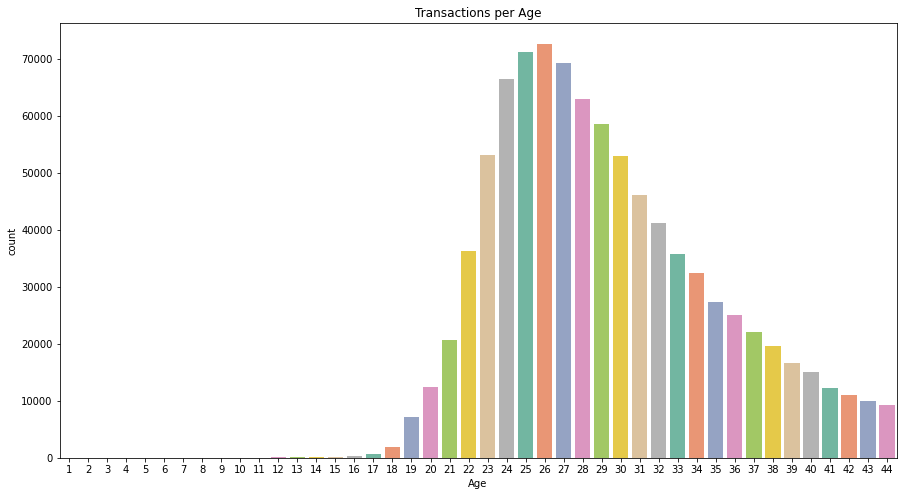

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Age', data = new_df, palette = 'Set2')
plt.title('Transactions per Age')

A large number of transactions are done by customers in the between the ages of 20 to 30. The reson beshind this,is that they are currently in the beginning of their careers and they are spenind a lot of money in order to maintain their life styles. Or they could be running small businesses that requires to constantly do transactions, pay for bills etc. 

Text(0.5, 1.0, 'Account Balances per Age')

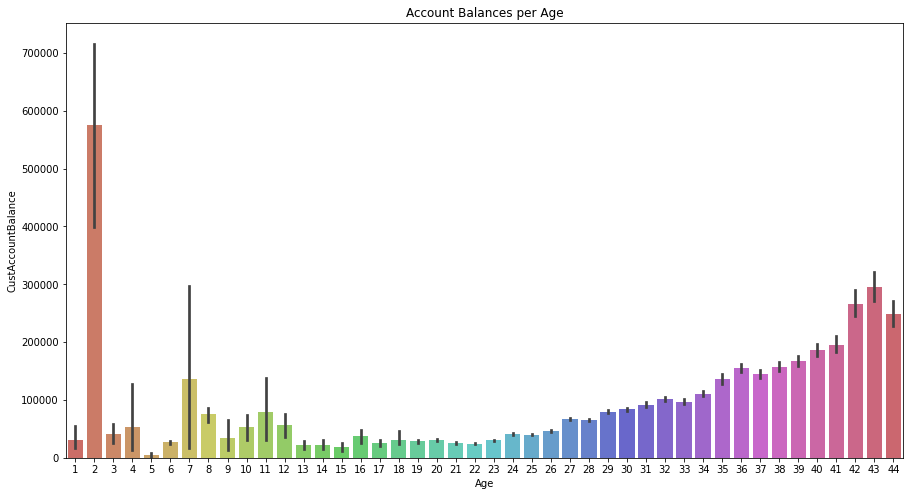

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x ='Age', y = 'CustAccountBalance' ,data = new_df, palette = 'hls')
plt.title('Account Balances per Age')

40-44 age group have higher account balance than the 18- 30 year old. The reaon could be that they have started saving more towards their retirement plans and spending less. We do see a high signifanct ammount in 2 year old. Most probably, an adult created than account to save up for their children's future on behalf of the children

Text(0.5, 1.0, 'Transaction Amount per Age')

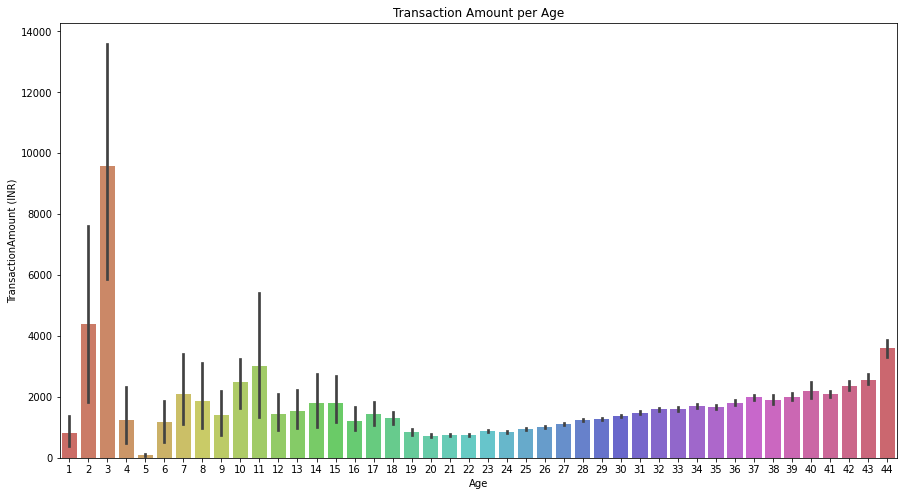

In [32]:
plt.figure(figsize=(15,8))
sns.barplot( x = 'Age', y ='TransactionAmount (INR)', data = new_df, palette = 'hls')
plt.title('Transaction Amount per Age')

On average 19- 24 year olds have less transaction amounts than 35 and above custmers. This could be that they do not have large families yet, that they need to support or spend large amounts on them. The highest transaction amount is seen in the 3 years old. Which could be that the parents might have used the amount on behalf of the children. 

**Transactions done Daily and Monthly**

Text(0.5, 1.0, 'Total Transaction Amount done daily')

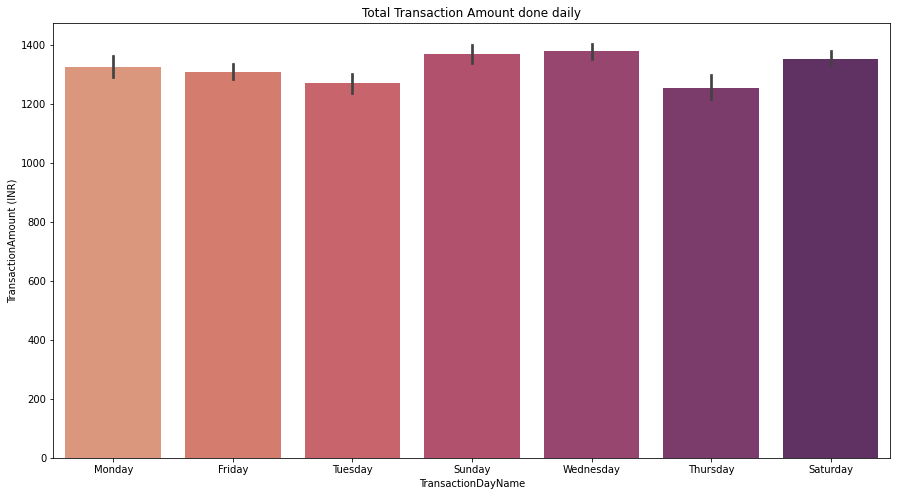

In [33]:
#Looking at transactions per day of the week 
plt.figure(figsize=(15,8))
sns.barplot( x = 'TransactionDayName', y ='TransactionAmount (INR)', data = new_df, palette = 'flare')
plt.title('Total Transactions done daily')

The highest number of transactions on average are done on Sunday, Which could be the start of the week for most clients. Preparing for the first business day which is Monday. 

Text(0.5, 1.0, 'Total Transactions done Monthly')

<Figure size 1080x576 with 0 Axes>

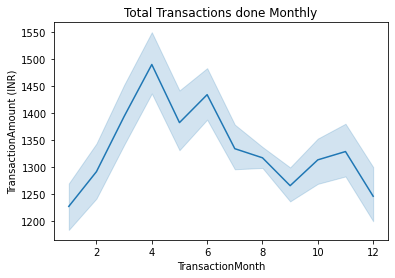

In [34]:
#Looking at transactions per month of the year
plt.figure(figsize=(15,8))
line,ax = plt.subplots() 
ax = sns.lineplot(x = 'TransactionMonth', y= 'TransactionAmount (INR)', data = new_df);
plt.title('Total Transactions done Monthly')

In the first quarter of the year, there is a rise in the monthly transactions been done. Indicating that customers getting into the financial stability around April, after the festive season. Then we see a drop in transactions on the third quarter of the year, indicating that customers have started saving toeards the festive season and sspending less. 

**Highest Transcations by Location**

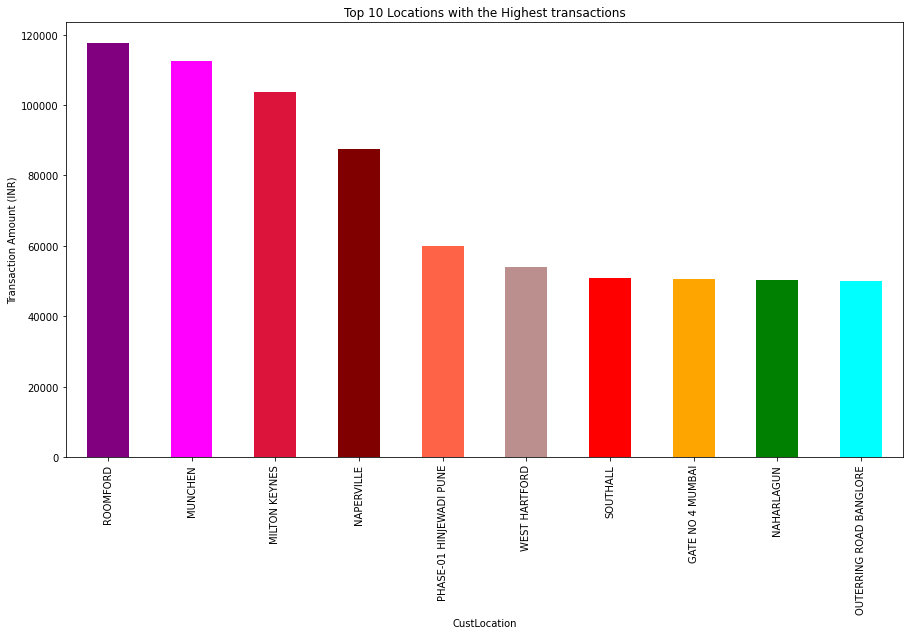

In [35]:
plt.figure(figsize=(15,8))
new_df.groupby('CustLocation')['TransactionAmount (INR)'].mean().sort_values(ascending=False)[:10].plot(kind='bar',color=['purple','magenta','crimson','maroon','tomato','rosybrown','red','orange','green','cyan'])
plt.ylabel('Transaction Amount (INR)')
plt.title('Top 10 Locations with the Highest transactions') ;

Customers belonging to the Roomford bank branch in United Kingdom mostly perform the highest transactions which are closely followed by the bank branch in Munchen in Germany.

<a id="features"></a>

## 5. **Feature Engineering**

**Encoding Categorical Variables**

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [36]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [37]:
encoder = LabelEncoder()
new_df.CustLocation = encoder.fit_transform(new_df.CustLocation)
new_df.CustLocation = new_df.CustLocation.astype(np.int64)

**Manual Encoding**

Here we encode the gender numerically.



In [38]:
new_df.CustGender.replace(['F','M'],[0,1],inplace=True)
new_df.CustGender = new_df.CustGender.astype(np.int64)

In [39]:
new_df.drop(['TransactionMonthName','TransactionDayName','TransactionID','CustomerID' ],axis=1,inplace=True)

**Feature Scaling**


In [40]:
cl_df = new_df.copy()

In [41]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cl_df)
scaled_df = pd.DataFrame(scaled_df,columns=cl_df.columns)
scaled_df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionMonth,TransactionDay
0,-1.62,-0.23,-0.16,-0.28,-0.23,-1.26,-2.02,-0.88
1,-1.62,0.49,-0.16,-0.29,-0.15,-1.61,-2.02,-0.88
2,-1.62,0.49,1.91,-0.29,0.13,2.43,-2.02,-0.88
3,-1.62,0.66,-0.19,0.46,0.08,-0.21,-2.02,-0.88
4,-1.62,-0.27,-0.07,0.32,-0.12,2.61,-2.02,-0.88


In [42]:
#clustering sample
samp = scaled_df.sample(n=50000)

In [43]:
samp.shape

(50000, 8)

<a id="features"></a>

## 5.1 **Cluster Analysis**

Cluster analysis is a statistical method for processing data. It works by organising items into groups, or clusters, on the basis of how closely associated they are. In this section we will be using three typres of clustering Algorrithms which are **Kmeans** , **Hierarchical** and **DBSCAN**.

We will be using the Silhouette Score to validate the quality of our clusters.
The value of the Silhouette score varies from **-1 to 1**. If the score is 1, the **cluster is dense and well-separated than other clusters**. A value near 0 represents **overlapping clusters** with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got **assigned to the wrong clusters**. 

**K Means Clustering**

K-means is an example of what is known as a hard clustering method, which means that the clusters, or groups that result, are distinct and non-overlapping. In other words, each observation will ultimately belong to only one cluster, although it may be passed around between clusters during the iterative training of the clustering model.

The main objective in K-Means is to partition a dataset into K clusters. This is achieved by randomly initialising K cluster centroids (points to be used as the cluster centers), assigning each data point to the nearest centroid (according to some distance measure), and then updating the cluster centroids as well as data point membership at each iteration until the centroids stop changing.


In [44]:
base_kmeans = KMeans(random_state = 101 )
base_kmeans.fit(samp)

KMeans(random_state=101)

In [45]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
labels = set(base_kmeans.labels_)
labels

{0, 1, 2, 3, 4, 5, 6, 7}

In [46]:
from sklearn.metrics import silhouette_score
print("Silhouette Score:",str(np.round(silhouette_score(samp,base_kmeans.labels_)*100,2)) + '%')

Silhouette Score: 16.61%


In [47]:
for i in range(1,11):
    for init in ['k-means++','random']:
        for algo in ['auto','full','elkan']:
            kmeans = KMeans(n_clusters = i, init = init, algorithm = algo, random_state = 101)
            kmeans.fit(samp)
            print("Number of Clusters: {}".format(i))
            print("Initialization Algorithm: {}".format(init))
            print("Algorithm: {}".format(algo))
            print("Sum of Squared Distance: %d" % kmeans.inertia_)
            print('-----------------')

Number of Clusters: 1
Initialization Algorithm: k-means++
Algorithm: auto
Sum of Squared Distance: 398416
-----------------
Number of Clusters: 1
Initialization Algorithm: k-means++
Algorithm: full
Sum of Squared Distance: 398416
-----------------
Number of Clusters: 1
Initialization Algorithm: k-means++
Algorithm: elkan
Sum of Squared Distance: 398416
-----------------
Number of Clusters: 1
Initialization Algorithm: random
Algorithm: auto
Sum of Squared Distance: 398416
-----------------
Number of Clusters: 1
Initialization Algorithm: random
Algorithm: full
Sum of Squared Distance: 398416
-----------------
Number of Clusters: 1
Initialization Algorithm: random
Algorithm: elkan
Sum of Squared Distance: 398416
-----------------
Number of Clusters: 2
Initialization Algorithm: k-means++
Algorithm: auto
Sum of Squared Distance: 348185
-----------------
Number of Clusters: 2
Initialization Algorithm: k-means++
Algorithm: full
Sum of Squared Distance: 348185
-----------------
Number of Clust

In [48]:
optimized_kmeans = KMeans(n_clusters = 10,init = 'k-means++', algorithm = 'elkan', random_state = 101)
optimized_kmeans.fit(samp)
print("Silhouette Score:",str(np.round(silhouette_score(samp,optimized_kmeans.labels_)*100,2)) + '%')

Silhouette Score: 16.76%


In [49]:
print("Estimated number of clusters:", len(set(optimized_kmeans.labels_)), set(optimized_kmeans.labels_))
print("Estimated number of noise points:", list(optimized_kmeans.labels_).count(-1))

Estimated number of clusters: 10 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Estimated number of noise points: 0


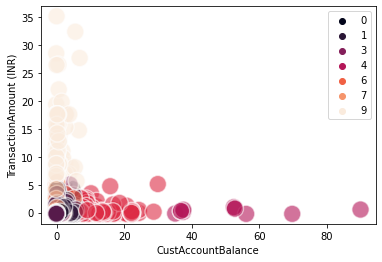

In [50]:
sns.scatterplot(x ='CustAccountBalance',y = 'TransactionAmount (INR)', data = samp, 
                hue = optimized_kmeans.labels_,s = 300,alpha = 0.6, palette = 'rocket')

In [51]:
from clusteval import clusteval
x = clusteval(cluster='kmeans',savemem=True,verbose=4)
results = x.fit(np.reshape(np.ravel(samp.sample(5000)),(-1,1)))
cluster_labels = results['labx']


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.
[clusteval] >Save memory enabled for kmeans with evaluation silhouette.


100%|██████████| 23/23 [07:43<00:00, 20.17s/it]

[clusteval] >Optimal number clusters detected: [24].
[clusteval] >Fin.


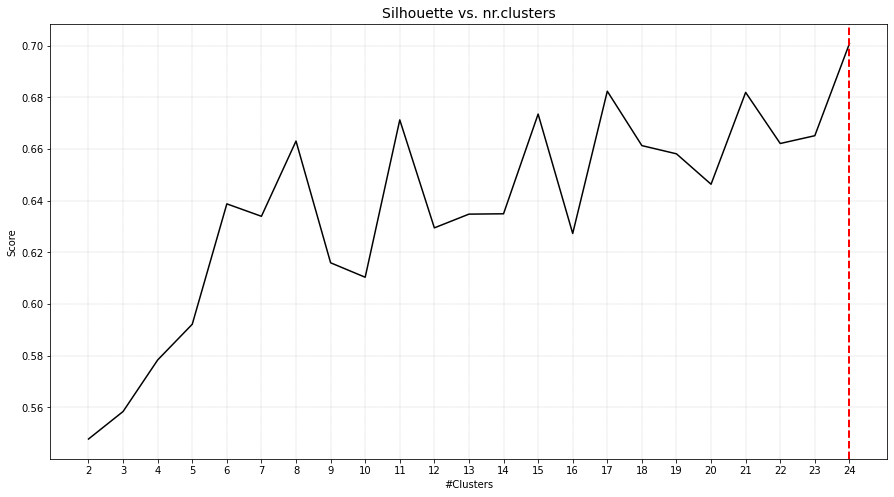

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39aa43f850>)

In [52]:
x.plot()

- Considering our Silhouette analysis, the quality of our clusters in the K means is below average. Meaning that we have overlapping clusters.

**Hierarchical Clustering**

Hierarchical Clustering - a clustering method where data is arranged in a tree-like structure such that parent clusters contain smaller child clusters, which also have their own child clusters and so on. There are two main types of hierarchical clustering algorithms:

**Divisive hierarchical clustering -**a top-down clustering approach that starts with a large single cluster and iteratively divides it into smaller and smaller clusters until each cluster contains a single data point.

**Agglomerative hierarchical clustering -** a bottom-up approach that starts with many "single data point clusters" and iteratively merges them into fewer and fewer clusters until all data points belong to the same cluste

In [53]:
mmscaler = MinMaxScaler()
minmax_scaled_df = mmscaler.fit_transform(cl_df)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df,columns=cl_df.columns)
minmax_scaled_df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionMonth,TransactionDay
0,0.00,0.38,0.00,0.61,0.00,0.49,0.09,0.00
1,0.00,0.57,0.00,0.60,0.00,0.44,0.09,0.00
2,0.00,0.57,0.02,0.60,0.00,0.98,0.09,0.00
3,0.00,0.61,0.00,0.77,0.00,0.63,0.09,0.00
4,0.00,0.37,0.00,0.74,0.00,1.00,0.09,0.00


In [54]:
samp_2 = minmax_scaled_df.sample(n=15000)

In [55]:
base_hc = AgglomerativeClustering()
base_hc.fit(samp_2)

AgglomerativeClustering()

In [56]:
print("Estimated number of clusters:", set(base_hc.labels_))

Estimated number of clusters: {0, 1}


In [57]:
print("Estimated number of noise points:", list(base_hc.labels_).count(-1))

Estimated number of noise points: 0


In [58]:
print("Silhouette Score:",str(np.round(silhouette_score(samp_2,base_hc.labels_)*100,2)) + '%')

Silhouette Score: 42.58%


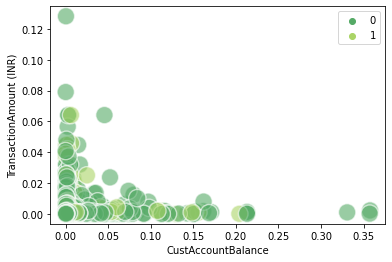

In [59]:
sns.scatterplot(samp_2['CustAccountBalance'],samp_2['TransactionAmount (INR)'], hue = base_hc.labels_, s = 300, alpha = 0.6, palette = 'summer')

In [60]:
samp_2= samp_2.sample(500)
x = clusteval(verbose=4)
output = x.fit(np.reshape(np.ravel(samp_2),(-1,1)))
output


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 23/23 [00:05<00:00,  3.85it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [24].
[clusteval] >Fin.


{'evaluate': 'silhouette', 'score':     clusters  score
 0          2   0.70
 1          3   0.66
 2          4   0.68
 3          5   0.69
 4          6   0.72
 5          7   0.73
 6          8   0.72
 7          9   0.73
 8         10   0.75
 9         11   0.75
 10        12   0.75
 11        13   0.75
 12        14   0.77
 13        15   0.78
 14        16   0.77
 15        17   0.78
 16        18   0.78
 17        19   0.79
 18        20   0.80
 19        21   0.80
 20        22   0.80
 21        23   0.81
 22        24   0.81, 'labx': array([ 0, 21,  0, ...,  7, 21,  8], dtype=int32), 'fig': {'silscores': array([0.69666409, 0.66015248, 0.68205948, 0.69263298, 0.71786532,
         0.73257638, 0.71667254, 0.73313326, 0.74520312, 0.74757927,
         0.74910093, 0.75194093, 0.76689289, 0.77567114, 0.77204393,
         0.77682595, 0.78184912, 0.78907647, 0.79846022, 0.8043623 ,
         0.80459937, 0.80721321, 0.80751736]),
  'sillclust': array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9

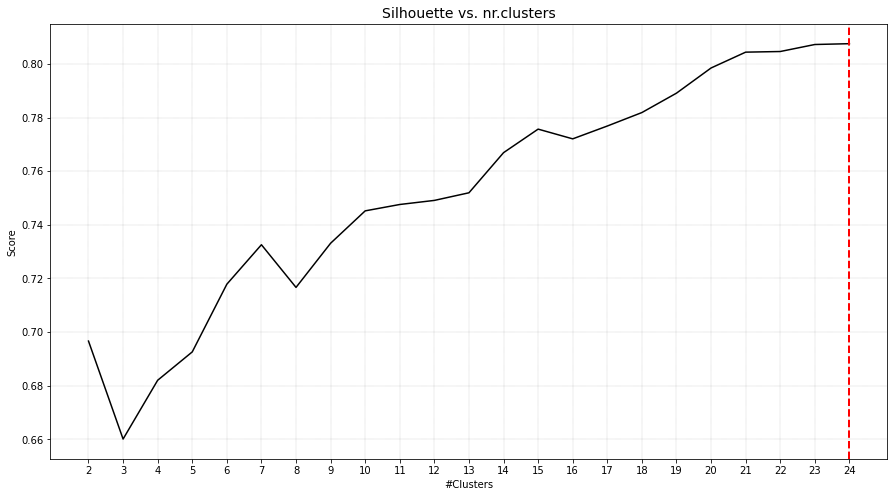

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39a81a6310>)

In [61]:
x.plot()

- Considering our Silhouette analysis, the quality of our clusters in the heirarchical is slightly below average, however better than the K means clusters. Meaning that we have overlapping clusters. 

**Density-based Spatial Clustering with Applications with Noise(DBSCAN)**

**Density-Based Clustering** refers to unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

The DBSCAN algorithm uses two parameters:

**minPts:** The minimum number of points (a threshold) clustered together for a region to be considered dense.

**eps (ε):** A distance measure that will be used to locate the points in the neighborhood of any point.

In [62]:
base_dbscan = DBSCAN()
base_dbscan.fit(samp)

DBSCAN()

In [63]:
print("Estimated number of clusters:", set(base_dbscan.labels_))

Estimated number of clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, -1}


In [64]:
print("Estimated number of noise points:", list(base_dbscan.labels_).count(-1))

Estimated number of noise points: 8799


In [65]:
print("Silhouette Score:",str(np.round(silhouette_score(samp,base_dbscan.labels_)*100,2)) + '%')

Silhouette Score: -34.88%


In [66]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):
    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)
    distances, indices = nbrs.kneighbors(X)                          
    distances = np.sort(distances[:,k-1], axis=0)
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.show()
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    knee.plot_knee()
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.show()
    return distances[knee.knee]

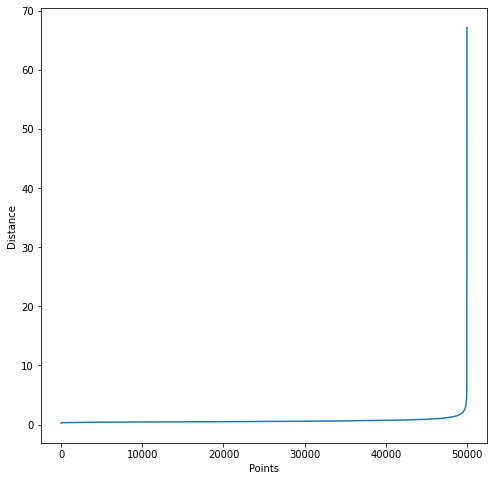

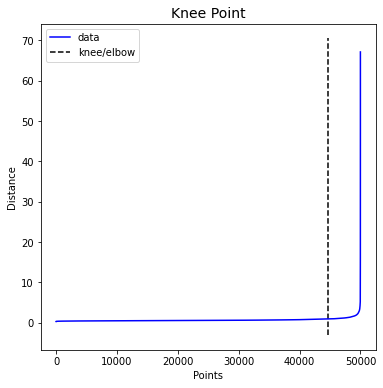

Knee Point: 0.8757616716202542


In [67]:
kn = 2 * samp.shape[-1] 
n = get_kdist_plot(samp,kn)
print("Knee Point:",n)

In [68]:
ms = np.arange(3,2*samp.shape[1],3)
silhouette_scores = []

for i in ms:
    dbscan = DBSCAN(eps=n,min_samples=i)
    dbscan.fit(samp)
    silhouette_scores.append(silhouette_score(samp,dbscan.labels_))
    print("{} Minimum Samples Tested!".format(i))

3 Minimum Samples Tested!
6 Minimum Samples Tested!
9 Minimum Samples Tested!
12 Minimum Samples Tested!
15 Minimum Samples Tested!


Text(0, 0.5, 'Silhouette Score')

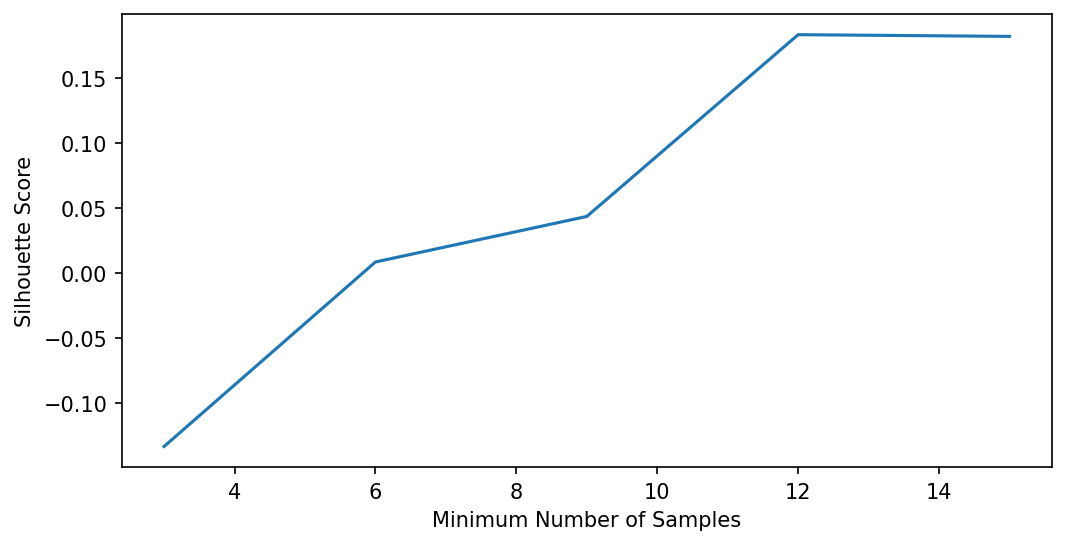

In [69]:
plt.figure(figsize=(8,4),dpi=150)
sns.lineplot(ms,silhouette_scores)
plt.xlabel('Minimum Number of Samples')
plt.ylabel('Silhouette Score')

In [83]:
optimized_dbscan = DBSCAN(eps = n ,min_samples = 10)
optimized_dbscan.fit(samp)

DBSCAN(eps=0.8757616716202542, min_samples=10)

In [84]:
print("Estimated number of clusters:",set(optimized_dbscan.labels_))

Estimated number of clusters: {0, 1, -1}


In [85]:
print("Estimated number of noise points:",list(optimized_dbscan.labels_).count(-1))

Estimated number of noise points: 2442


In [86]:
print("Silhouette Score:",str(np.round(silhouette_score(samp, optimized_dbscan.labels_)*100,2)) + '%')

Silhouette Score: 21.25%


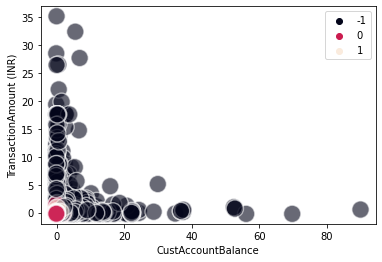

In [87]:
sns.scatterplot(data = samp, x = 'CustAccountBalance', y = 'TransactionAmount (INR)',
                hue = optimized_dbscan.labels_,s = 300, alpha = 0.6, palette = 'rocket')

In [88]:
samp['Cluster'] = optimized_dbscan.labels_

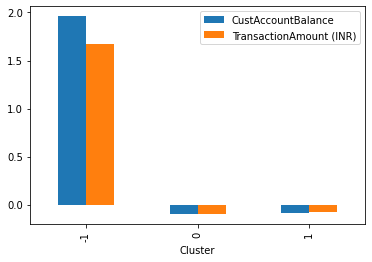

In [89]:
samp.groupby('Cluster')[['CustAccountBalance','TransactionAmount (INR)']].mean().plot(kind='bar')

**Determination of Optimum Epsilon Value for DBSCAN Model**

In [90]:
samp_2 = samp.sample(500)
x = clusteval(cluster='dbscan',verbose=3)
output = x.fit(np.reshape(np.ravel(samp_2),(-1,1)))
output


[clusteval] >Fit using dbscan with metric: euclidean, and linkage: ward
[clusteval] >Gridsearch across epsilon..
[clusteval] >Evaluate using silhouette..


100%|██████████| 245/245 [02:20<00:00,  1.74it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


{'evaluate': 'dbscan',
 'labx': array([0, 0, 0, ..., 0, 0, 0]),
 'fig': {'eps': array([0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 ,
         0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 , 0.52,
         0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 , 0.72, 0.74,
         0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96,
         0.98, 1.  , 1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18,
         1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 , 1.32, 1.34, 1.36, 1.38, 1.4 ,
         1.42, 1.44, 1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62,
         1.64, 1.66, 1.68, 1.7 , 1.72, 1.74, 1.76, 1.78, 1.8 , 1.82, 1.84,
         1.86, 1.88, 1.9 , 1.92, 1.94, 1.96, 1.98, 2.  , 2.02, 2.04, 2.06,
         2.08, 2.1 , 2.12, 2.14, 2.16, 2.18, 2.2 , 2.22, 2.24, 2.26, 2.28,
         2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 , 2.42, 2.44, 2.46, 2.48, 2.5 ,
         2.52, 2.54, 2.56, 2.58, 2.6 , 2.62, 2.64, 2.66, 2.68, 2.7 , 2.72,
         2.74, 2.76, 2

In [91]:
cluster_labels = results['labx']
cluster_labels
print("Distinct Cluster Labels Detected:",np.unique(cluster_labels))

Distinct Cluster Labels Detected: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


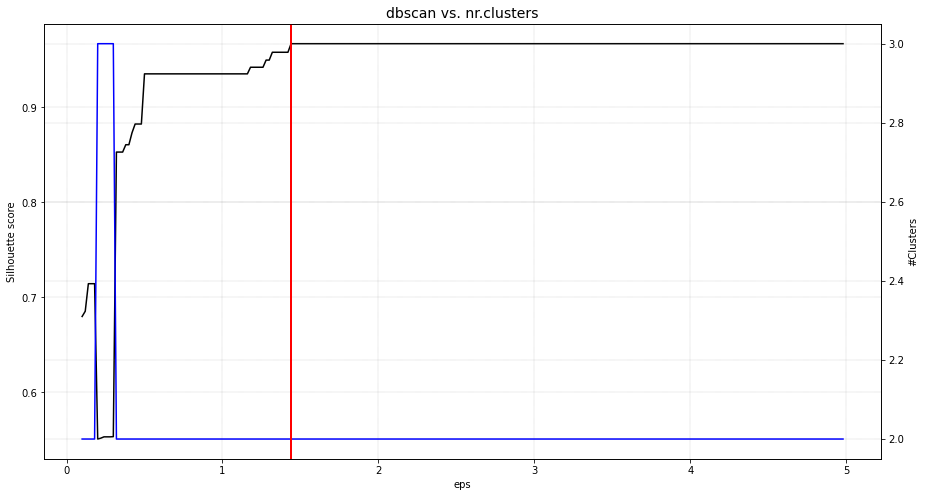

(<Figure size 1080x576 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f39a9717410>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f39a97eff50>))

In [92]:
x.plot()

In [ ]:
enhanced_dbscan = DBSCAN(eps = 3, min_samples = 2*samp.shape[1])
enhanced_dbscan.fit(samp)

In [ ]:
print("Estimated number of clusters:",len(set(enhanced_dbscan.labels_)),set(enhanced_dbscan.labels_))

Estimated number of clusters: 2 {0, -1}


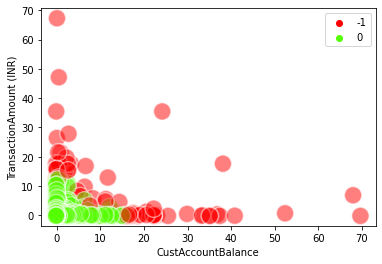

In [ ]:
sns.scatterplot(data = samp, x = 'CustAccountBalance', y = 'TransactionAmount (INR)',
                hue = enhanced_dbscan.labels_, palette = 'prism', s = 300, alpha = 0.5)

In [ ]:
print("Silhouette Score:",str(np.round(silhouette_score(samp, enhanced_dbscan.labels_)*100,2)) + '%')

Silhouette Score: 83.47%


Considering the Silhouette score, the optimised DBSCAN model performed better than the K means and Heirarchical clustering. It is able to cluster the bank customers into two groups. On of the cluster groups consist of customers who make low transactions and adeqaute account balances. The second cluster group includes customers with a slight minimal account balance but make high value transaction or customers that spend less money and have high account balances. 

<a id="Conclusion"></a>
## 6. **Conclusion**